# plotting results of dimensionality reduction

**presentation key**

session id –> mouse
1. 1053925378
2. 1064415305
3. 1081090969
4. 1108334384
5. 1115356973

HMM states:
- Forest Green = 0 (high running speed and low pupil area) '#2AAA8A'
- Pumpkin Orange = 1 (low running speed and high pupil area) '#FF7518'

In [116]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
import plotly.express as px
from sklearn.metrics import silhouette_score
from data.load_data import *
from PCA_utils import *
from collections import defaultdict
import time
import pickle
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [210]:
with open('AvP_dict_all.pkl', 'rb') as file:
    AvP_dict = pickle.load(file)

In [136]:
with open('HMM_dict_VISp_new.pkl', 'rb') as file:
    HMM_dict = pickle.load(file)

**1. active vs passive**
- is dimensionality always lower? --> look for lower PR values for one state over the other
- is stim classification better? --> look for higher SS stims
- is it time varying? --> look for SS times
- do active and passive separate well? --> look at SS states

**2. AvP vs HMM states**
- better stim SSs?
- better time SSs?
- lower PRs? or larger diffs btwn PR for different states

**3. top things but for HMMs (interpretable names?)**

In [179]:
AvP_dict['1053925378']['full']['evals'].shape

(697,)

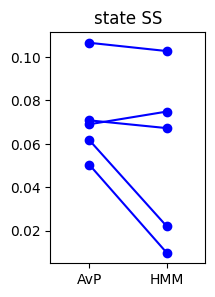

In [137]:
plt.figure(figsize=(2,3))
for session in AvP_dict.keys():
    AvP = AvP_dict[session]['full']
    HMM = HMM_dict[session]['full']
    
    plt.plot([0,1], [AvP['ss state'],HMM['ss state']], c='b') 
    plt.scatter([0,1], [AvP['ss state'],HMM['ss state']], c='b')    
    plt.xticks([0,1], labels=['AvP', 'HMM'])
    plt.xlim(-.5,1.5)
    plt.title('state SS')

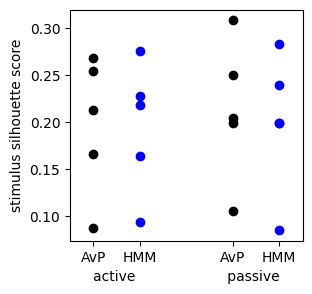

In [168]:
%matplotlib inline
plt.figure(figsize=(3,3))
for session in AvP_dict.keys():
    s = AvP_dict[session]
    AvP_a = s['1']
    AvP_p = s['0']
    
    s = HMM_dict[session]
    HMM_a = s['0']
    HMM_p = s['1']
    
    plt.scatter(0, AvP_a['SS stim'], c='k')
    plt.scatter(1, HMM_a['SS stim'], c='b')
    
    plt.scatter(3, AvP_p['SS stim'], c='k')
    plt.scatter(4, HMM_p['SS stim'], c='b')
    
    plt.xticks([0,1,3,4], labels=['AvP','HMM','AvP','HMM'])
    plt.xlim(-.5,4.5)
    
plt.ylabel('stimulus silhouette score');
plt.xlabel('active                     passive');

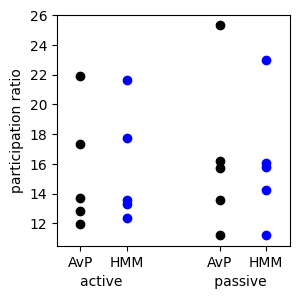

In [167]:
%matplotlib inline
plt.figure(figsize=(3,3))
for session in AvP_dict.keys():
    s = AvP_dict[session]
    AvP_a = s['1']
    AvP_p = s['0']
    
    s = HMM_dict[session]
    HMM_a = s['0']
    HMM_p = s['1']
    
    plt.scatter(0, AvP_a['PR'], c='k')
    plt.scatter(1, HMM_a['PR'], c='b')
    
    plt.scatter(3, AvP_p['PR'], c='k')
    plt.scatter(4, HMM_p['PR'], c='b')
    
    plt.xticks([0,1,3,4], labels=['AvP','HMM','AvP','HMM'])
    plt.xlim(-.5,4.5)
    
plt.ylabel('participation ratio');
plt.xlabel('active                     passive');

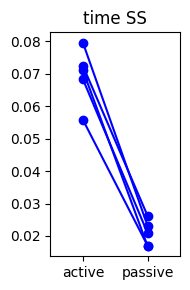

In [99]:
plt.figure(figsize=(2,3))
for session in AvP_dict.keys():
    s = AvP_dict[session]
    
    active = s['1']
    passive = s['0']
    
    plt.scatter([0,1], [active['SS time'], passive['SS time']], c='b')
    plt.plot([0,1], [active['SS time'], passive['SS time']], c='b')
    plt.xticks([0, 1], labels=['active','passive'])
    plt.xlim([-.5,1.5])
    plt.title('time SS')

plt.tight_layout()

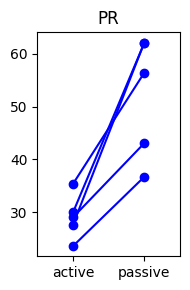

In [100]:
plt.figure(figsize=(2,3))
for session in AvP_dict.keys():
    s = AvP_dict[session]
    
    active = s['1']
    passive = s['0']
    
    plt.scatter([0,1], [active['PR'], passive['PR']], c='b')
    plt.plot([0,1], [active['PR'], passive['PR']], c='b')
    plt.xticks([0, 1], labels=['active','passive'])
    plt.xlim([-.5,1.5])
    plt.title('PR')

plt.tight_layout()

#### PC plots

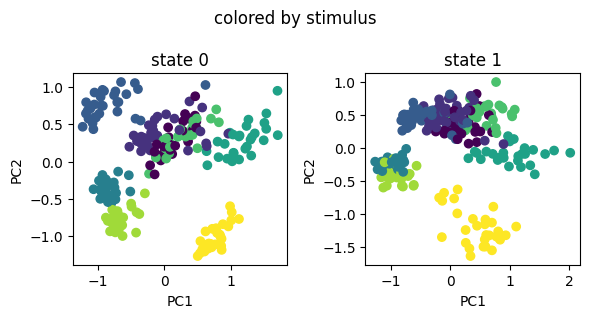

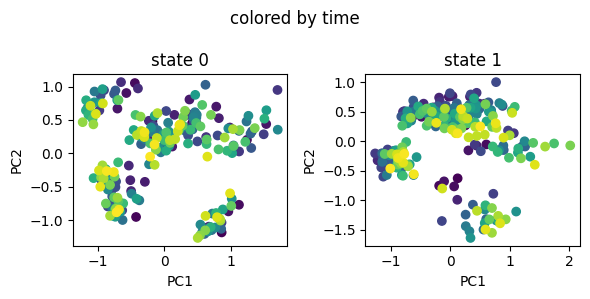

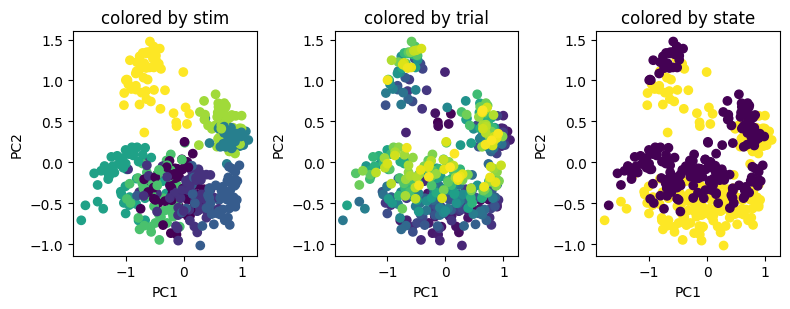

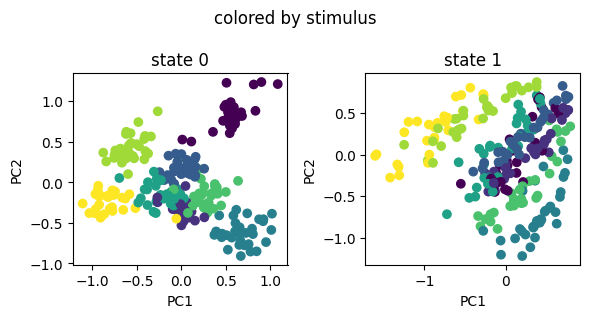

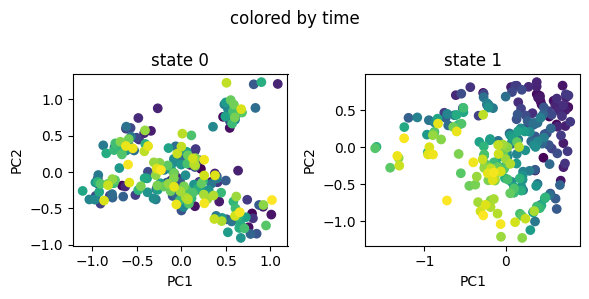

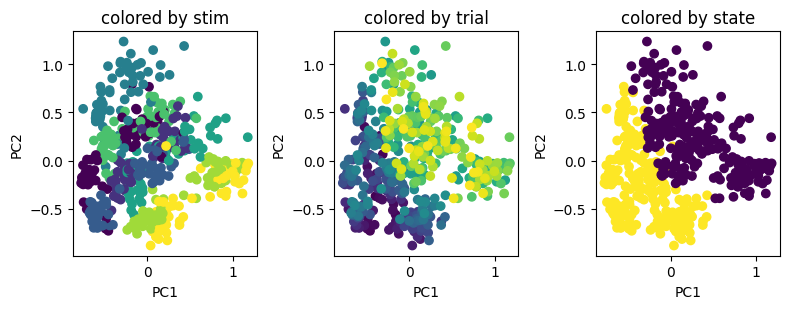

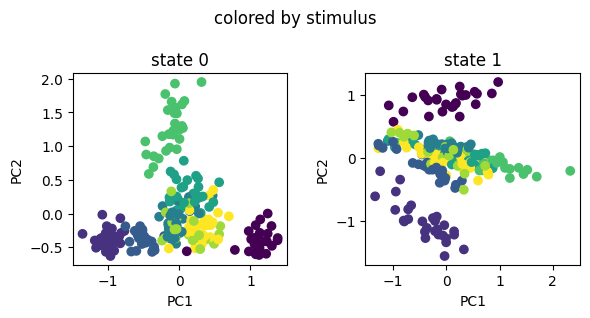

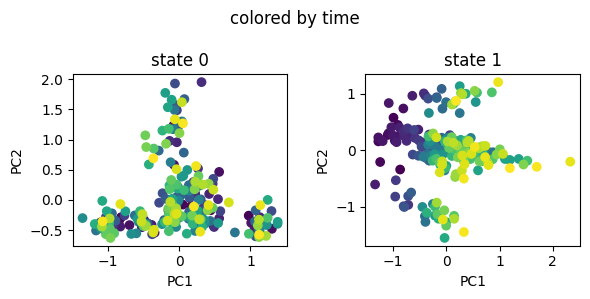

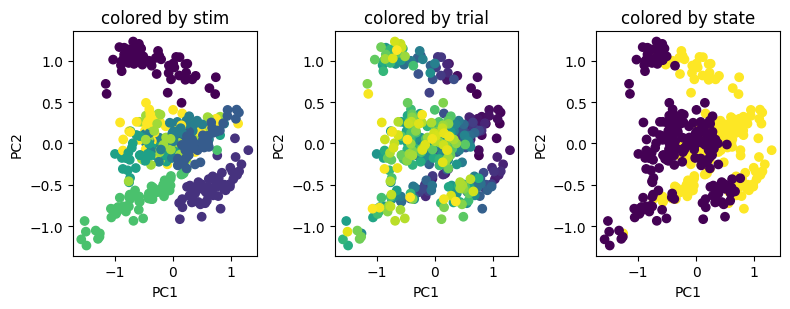

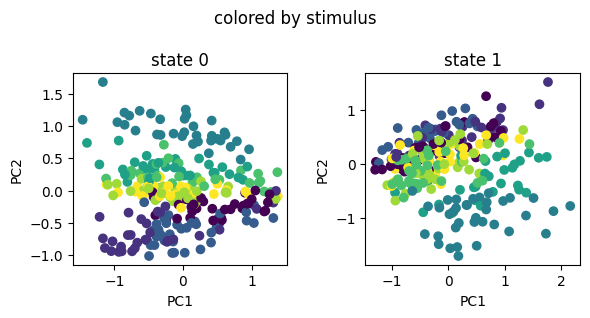

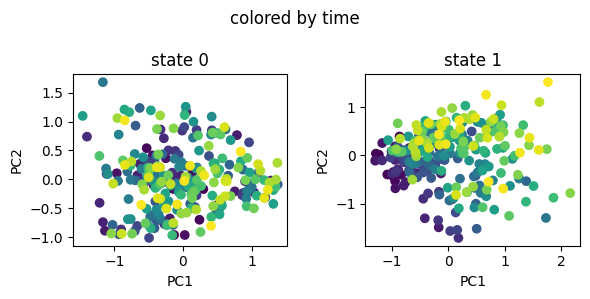

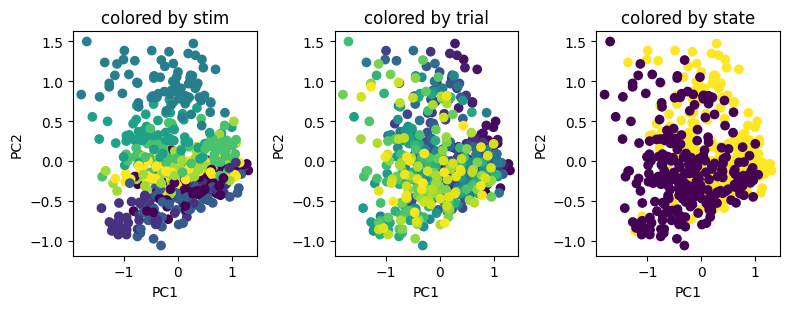

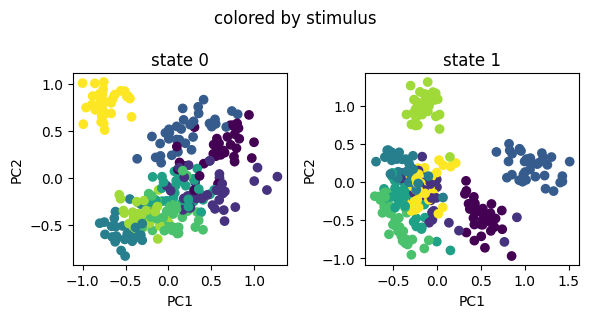

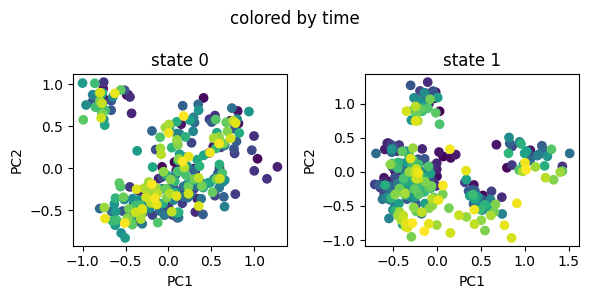

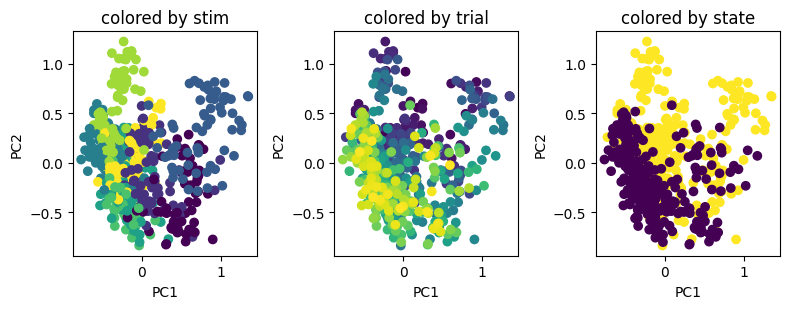

In [187]:
%matplotlib inline
for session in AvP_dict.keys():
    session_dict = AvP_dict[session]
    plot_state_pcas(session_dict)
    plot_full_pca(session_dict)

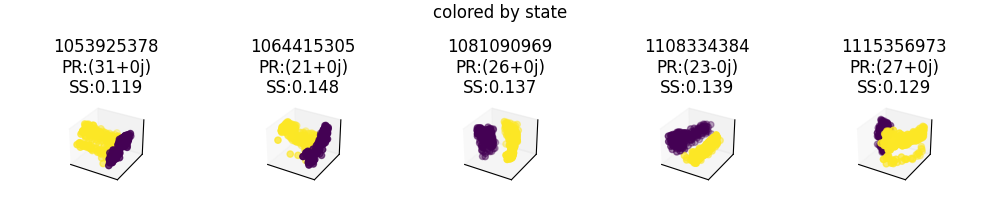

In [184]:
%matplotlib widget
f = plt.figure(figsize=(10,2))

for n,session in enumerate(AvP_dict.keys()):
    s = AvP_dict[session]['full']
    
    ax = f.add_subplot(1, 5, n+1, projection='3d')
    
    title = session + '\nPR:' + str(round(s['PR'])) + '\nSS:' + str(round(s['ss state'],3))
    
    ax.scatter(s['project'][0], s['project'][1], s['project'][2], c=s['state labels'])
    ax.set(title=title, xticks=[], yticks=[], zticks=[])
    
plt.suptitle('colored by state')
plt.tight_layout()

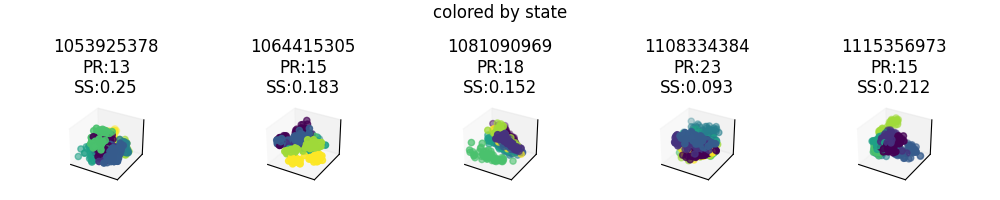

In [215]:
%matplotlib widget
f = plt.figure(figsize=(10,2))

for n,session in enumerate(AvP_dict.keys()):
    s = HMM_dict[session]['full']
    
    ax = f.add_subplot(1, 5, n+1, projection='3d')
    
    title = session + '\nPR:' + str(round(s['PR'])) + '\nSS:' + str(round(s['SS stim'],3))
    
    ax.scatter(s['project'][0], s['project'][1], s['project'][2], c=s['stim labels'])
    # ax.scatter(s['project'][0], s['project'][1], s['project'][2], c=[int(not bool(x)) for x in s['state labels']])
    ax.set(title=title, xticks=[], yticks=[], zticks=[])
    
plt.suptitle('colored by state')
plt.tight_layout()

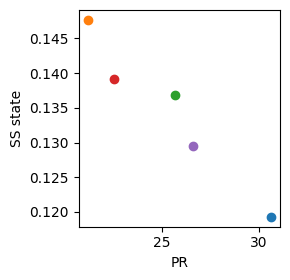

In [106]:
%matplotlib inline

plt.figure(figsize=(3,2.9))

for n,session in enumerate(AvP_dict.keys()):
    s = AvP_dict[session]['full']
    
    plt.scatter(s['PR'], s['ss state'])
    
    # plt.scatter(s['project'][0], s['project'][1], c=s['state labels'])
    # ax.set(title=title, xticks=[], yticks=[], zticks=[])
    
# plt.legend(labels=AvP_dict.keys())
plt.xlabel('PR')
plt.ylabel('SS state')
plt.tight_layout()

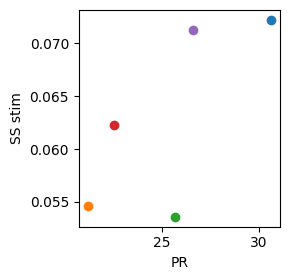

In [107]:
%matplotlib inline

plt.figure(figsize=(3,2.9))

for n,session in enumerate(AvP_dict.keys()):
    s = AvP_dict[session]['full']
    
    plt.scatter(s['PR'], s['SS stim'])

plt.xlabel('PR')
plt.ylabel('SS stim')
plt.tight_layout()

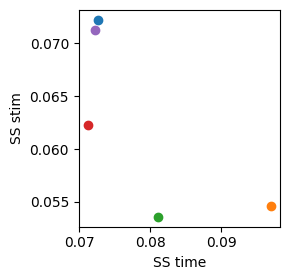

In [108]:
%matplotlib inline

plt.figure(figsize=(3,2.9))

for n,session in enumerate(AvP_dict.keys()):
    s = AvP_dict[session]['full']
    
    plt.scatter(s['SS time'], s['SS stim'])

plt.xlabel('SS time')
plt.ylabel('SS stim')
plt.tight_layout()

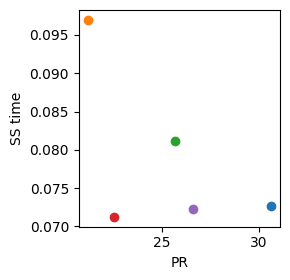

In [109]:
%matplotlib inline

plt.figure(figsize=(3,2.9))

for n,session in enumerate(AvP_dict.keys()):
    s = AvP_dict[session]['full']
    
    plt.scatter(s['PR'], s['SS time'])

plt.xlabel('PR')
plt.ylabel('SS time')
plt.tight_layout()

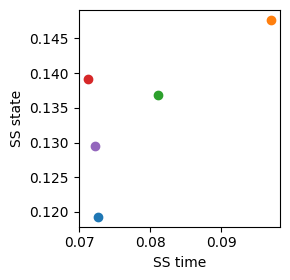

In [110]:
%matplotlib inline

plt.figure(figsize=(3,2.9))

for n,session in enumerate(AvP_dict.keys()):
    s = AvP_dict[session]['full']
    
    plt.scatter(s['SS time'], s['ss state'])

plt.xlabel('SS time')
plt.ylabel('SS state')
plt.tight_layout()